## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: 

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [95]:
train_data = pd.read_excel(r'D:\Projects\Data_train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
test_data = pd.read_excel(r'D:\Projects\Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [97]:
## shape of the train and test data

print('the shape of train data is {}'.format(train_data.shape))
print('the shape of test data is {}'.format(test_data.shape))

the shape of train data is (10683, 11)
the shape of test data is (2671, 10)


In [98]:
### description of the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [99]:
## append the two dataset

final_data = train_data.append(test_data,sort = False)

In [100]:
final_data.shape

(13354, 11)

### Feature Engineering

In [101]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [102]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [103]:
# extracting information from 'date_of_journey' column and storing in new columns 'Journey_month' and 'journey_day' and year
final_data['Journey_month']= pd.to_datetime(final_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [104]:
# extracting information from 'date_of_journey' column and storing in new columns 'Journey_month' and 'journey_day'
final_data['Journey_day']= pd.to_datetime(final_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [105]:
# extracting information from 'date_of_journey' column and storing in new columns 'Journey_month' and 'journey_day'
final_data['Journey_year']= pd.to_datetime(final_data["Date_of_Journey"], format="%d/%m/%Y").dt.year

In [106]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1,2019


In [107]:
final_data['Journey_day']=final_data['Journey_day'].astype(int)
final_data['Journey_month']=final_data['Journey_month'].astype(int)
final_data['Journey_year']=final_data['Journey_year'].astype(int)

In [108]:
## drop the Date of journey column

final_data.drop(['Date_of_Journey'],axis = 1,inplace = True)

In [109]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1,2019


In [110]:
### checking the arrival time

final_data['Arrival_hr'] = pd.to_datetime(final_data['Arrival_Time']).dt.hour
# Extracting Minutes from 'Arrival_Time' column by creating a new column 'Arrival_min'
final_data["Arrival_min"]= pd.to_datetime(final_data['Arrival_Time']).dt.minute

In [111]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1,2019,21,35


In [112]:
### check for null
final_data[final_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min
9039,Air India,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,5,6,2019,9,25


In [113]:
## filling the NaN of total_stops with 1 stop
final_data['Total_Stops']=final_data['Total_Stops'].fillna('1 stop')

In [114]:
final_data['Total_Stops'] = final_data['Total_Stops'].replace('non-stop','0 stop')

In [115]:
final_data['Stops'] = final_data['Total_Stops'].str.split(' ').str[0]

In [116]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,3897.0,3,24,2019,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1,2019,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9,2019,4,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12,2019,23,30,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1,2019,21,35,1


In [117]:
final_data['Stops']=final_data['Stops'].astype(int)
final_data.drop(['Total_Stops'],axis=1,inplace = True)

In [118]:
final_data.drop(['Arrival_Time'],axis = 1, inplace = True)

In [119]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,3,24,2019,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,5,1,2019,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,6,9,2019,4,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,5,12,2019,23,30,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,3,1,2019,21,35,1


In [120]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Journey_month    13354 non-null  int32  
 9   Journey_day      13354 non-null  int32  
 10  Journey_year     13354 non-null  int32  
 11  Arrival_hr       13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Stops            13354 non-null  int32  
dtypes: float64(1), int32(4), int64(2), object(7)
memory usage: 1.3+ MB


In [121]:
### seperate the Departure time to hour and minutes column
final_data['Departure_Hour'] = final_data['Dep_Time'] .str.split(':').str[0]
final_data['Departure_Minute'] = final_data['Dep_Time'] .str.split(':').str[1]

In [122]:
final_data['Departure_Hour']=final_data['Departure_Hour'].astype(int)
final_data['Departure_Minute']=final_data['Departure_Minute'].astype(int)
final_data.drop(['Dep_Time'],axis=1,inplace = True)

In [123]:
final_data.head(2)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min,Stops,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,3,24,2019,1,10,0,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,5,1,2019,13,15,2,5,50


In [124]:
final_data['route_1'] = final_data['Route'].str.split('→ ').str[0]
final_data['route_2'] = final_data['Route'].str.split('→ ').str[1]
final_data['route_3'] = final_data['Route'].str.split('→ ').str[2]
final_data['route_4'] = final_data['Route'].str.split('→ ').str[3]
final_data['route_5'] = final_data['Route'].str.split('→ ').str[4]

In [125]:
final_data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min,Stops,Departure_Hour,Departure_Minute,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,3,24,2019,1,10,0,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,5,1,2019,13,15,2,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,6,9,2019,4,25,2,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,5,12,2019,23,30,1,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,3,1,2019,21,35,1,16,50,BLR,NAG,DEL,NaN,NaN


In [126]:
## filling the price column with mean

final_data['Price'].fillna((final_data['Price'].mean()),inplace=True)

In [127]:
final_data['route_1'].fillna('None',inplace = True)
final_data['route_2'].fillna('None',inplace = True)
final_data['route_3'].fillna('None',inplace = True)
final_data['route_4'].fillna('None',inplace = True)
final_data['route_5'].fillna('None',inplace = True)

In [128]:

final_data.drop(['Route'],axis=1,inplace = True)
final_data.drop(['Duration'],axis=1,inplace = True)

In [129]:
final_data.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min,Stops,Departure_Hour,Departure_Minute,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,3,24,2019,1,10,0,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,5,1,2019,13,15,2,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,6,9,2019,4,25,2,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,5,12,2019,23,30,1,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,3,1,2019,21,35,1,16,50,BLR,NAG,DEL,None,None


In [130]:
final_data.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Journey_month       0
Journey_day         0
Journey_year        0
Arrival_hr          0
Arrival_min         0
Stops               0
Departure_Hour      0
Departure_Minute    0
route_1             0
route_2             0
route_3             0
route_4             0
route_5             0
dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
final_data["Airline"]=encoder.fit_transform(final_data['Airline'])
final_data["Source"]=encoder.fit_transform(final_data['Source'])
final_data["Destination"]=encoder.fit_transform(final_data['Destination'])
final_data["Additional_Info"]=encoder.fit_transform(final_data['Additional_Info'])
final_data["route_1"]=encoder.fit_transform(final_data['route_1'])
final_data["route_2"]=encoder.fit_transform(final_data['route_2'])
final_data["route_3"]=encoder.fit_transform(final_data['route_3'])
final_data["route_4"]=encoder.fit_transform(final_data['route_4'])
final_data["route_5"]=encoder.fit_transform(final_data['route_5'])

In [132]:
final_data.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_hr,Arrival_min,Stops,Departure_Hour,Departure_Minute,route_1,route_2,route_3,route_4,route_5
0,3,0,5,8,3897.0,3,24,2019,1,10,0,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,5,1,2019,13,15,2,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,6,9,2019,4,25,2,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,5,12,2019,23,30,1,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,3,1,2019,21,35,1,16,50,0,34,8,12,4


### Model Training

In [133]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [134]:
df_train = final_data[0:10683]
df_test = final_data[10683:]

In [135]:
X = df_train.drop(['Price'],axis = 1)
y = df_train.Price

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [137]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [138]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [139]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [140]:
selected_features=X_train.columns[(model.get_support())]

In [141]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Journey_month',
       'Journey_day', 'Arrival_hr', 'Arrival_min', 'Stops', 'Departure_Hour',
       'Departure_Minute', 'route_1', 'route_2', 'route_3', 'route_4',
       'route_5'],
      dtype='object')

In [144]:
X_train.drop(['Journey_year'],axis=1)

,Airline,Source,Destination,Additional_Info,Journey_month,Journey_day,Arrival_hr,Arrival_min,Stops,Departure_Hour,Departure_Minute,route_1,route_2,route_3,route_4,route_5
7106,8,0,2,8,4,6,8,35,0,5,55,0,13,24,12,4
7904,1,2,1,8,6,1,6,50,1,5,15,3,41,6,12,4
4861,4,2,1,5,6,12,12,35,2,14,35,3,34,4,5,4
9375,3,2,1,8,6,15,21,0,1,6,40,3,7,6,12,4
155,1,3,0,8,5,9,7,55,2,8,20,2,28,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,3,0,5,6,12,4,40,1,6,30,2,7,3,12,4
4859,1,2,1,8,6,9,19,15,2,22,0,3,16,4,5,4
3264,4,2,1,8,3,3,4,25,1,8,0,3,7,6,12,4
9845,4,2,1,5,5,18,12,35,1,11,30,3,7,6,12,4


In [145]:
X_test.drop(['Journey_year'],axis=1)

,Airline,Source,Destination,Additional_Info,Journey_month,Journey_day,Arrival_hr,Arrival_min,Stops,Departure_Hour,Departure_Minute,route_1,route_2,route_3,route_4,route_5
9693,3,2,1,8,3,27,16,10,1,4,55,3,20,6,12,4
9825,8,3,0,8,5,27,0,40,0,22,20,2,5,24,12,4
7702,1,3,0,8,6,6,20,25,2,5,50,2,25,9,3,4
1437,4,0,5,8,3,6,14,25,1,9,45,0,33,8,12,4
6828,3,2,1,8,6,15,1,30,1,16,0,3,7,6,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,3,2,1,8,5,21,21,0,1,8,30,3,7,6,12,4
7085,3,3,0,8,3,18,23,5,0,20,25,2,5,24,12,4
10331,6,2,1,8,6,9,19,0,1,10,20,3,7,6,12,4
872,4,3,0,8,5,18,10,5,1,21,10,2,7,3,12,4


### RandomForest regressior

In [146]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [147]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [148]:
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [149]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 50, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [150]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   5.9s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 33.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [151]:
y_pred=rf_random.predict(X_test)

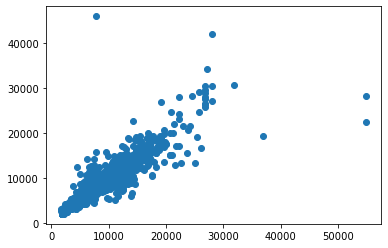

In [152]:
plt.scatter(y_test,y_pred)